# Wrangle OpenStreetMap Data with SQL

The objective of this study is to practice data wrangling and query skills on OpenStreetMap osm format of data, which is essentially written in xml structure.

The major process is comprised of four steps:
* Step 1: Data Preview
* Step 2: Data Audit
* Step 3: Data Cleaning
* Step 4: Data Query by SQL





## 1. Study Area

My study area is Hong Kong, located in Southern China, famous for its international financial significance, as well as the unique blend of British and Chinese history.

Hong Kong became a British colony after the First Opium War (1839-1842), and not until 1997, Hong Kong was returned to China 
as a Special Administrative Region. Due to this fact, Hong Kong has a very interesting mixture language usage: two written language systems- English and Traditional Chinese; and three spoken languages - English, Cantonese and Mandarin. 

This is also the main reason selecting this city as study area: the mixed language usage might result in interesting data auditing and cleaning oppotunities. 

Source Link to download Hong Kong OSM:
* MapZen (https://mapzen.com/data/metro-extracts/metro/hong-kong_china/)

## 2. Data Wrangling Challenges 

* Inconsistent City Name:
    - Region name mistaken as city name (HK has 3 Regions)
    - District name mistaken as cityname (HK has 18 districts)


* audit.py should be able to clean some of the problems encounted

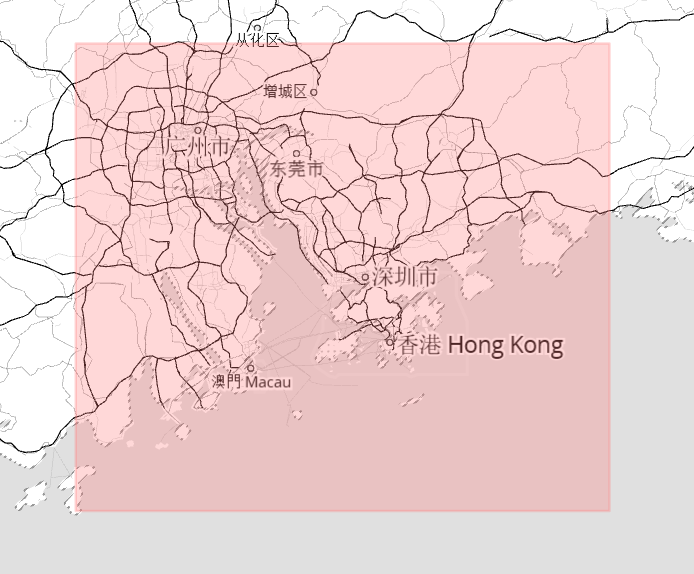

In [15]:
# Data Coverage from MapZen
from IPython.display import Image
Image(filename='Capture.png')

The first thing I noticed is that the data coverage provided by MapZen not only including Hong Kong, but also Macau and other mainland China cities.

### 2.1 The process of auditing



In [21]:
import xml.etree.cElementTree as ET
from collections import defaultdict
from collections import Counter
import re
import pprint

OSMFILE='sample.osm'
#OSMFILE='hong-kong_china.osm'

In [2]:
# Step 1: Iterative parsing xml file and count top-level tags
import iter_parsing
iter_parsing.count_tags(OSMFILE)

{'member': 2135,
 'nd': 34085,
 'node': 29639,
 'osm': 1,
 'relation': 87,
 'tag': 10754,
 'way': 3128}

In [ ]:
# Top 10 k_tag for Node elements
k_types=[]
for event,elem in ET.iterparse(OSMFILE):
    if elem.tag=='node':
        for child in elem.iter("tag"):
            k_types.append(child.attrib['k'])
Counter(k_types).most_common(15)

In [8]:
# check if second level "k" tags with attribute text "type"
## will overite the elements previously processed node["type"] field
## Add below to "Data.py" -- "Shape_Element" -- "audit.py"

k_types=[]
for event,elem in ET.iterparse(OSMFILE):
    if elem.tag=='node' or elem.tag=='way':
        for child in elem.iter("tag"):
            if "type" in child.attrib['k']:
                k_types.append(child.attrib['k'])
Counter(k_types)st

Counter({'artwork_type': 1,
         'border_type': 1,
         'garmin_type': 13,
         'mp_type': 11,
         'seamark:type': 4,
         'shelter_type': 1,
         'type': 21})

In [13]:
# Reference from Udacity demo
# 1. imported data to SQL, 
# 2. some basic querying find out problem 1:street name abbreviations. 
# 3. correcting street names by the below (not regular expression):

# test split()
streetname = 'S Tryon St Ste 105'

mapping = {"S": "South",
           "St": "Street"}

words = streetname.split()

for w in range(len(words)):
    if words[w] in mapping:
        if words[w].lower not in ['suite', 'ste']:
            words[w]=mapping[words[w]]
    name = " ".join(words)

name



'South Tryon Street Ste 105'

In [ ]:
mapping_city ={'Central':'香港 Hong Kong', 
               'Ta Kwu Ling':'香港 Hong Kong',
               'Tai Po':'香港 Hong Kong',
               'Wan Chai':'香港 Hong Kong',
               '元朗 Yuen Long', 
               '屯門 Tuen Mun',
               '梅窩 Mui Wo',
               '火炭 Fo Tan',
               '紅磡 Hung Hom',
               '荃灣 Tsuen Wan'}

hk_districts_eng=[]

In [29]:
district=['Yuen Long','Fo Tan','Hung Hom']

city='紅磡 Hung Hom'

#re_lst=re.compile(r"(?=("+'|'.join(string_lst)+r"))")
re_lst=re.compile('|'.join(district)) # join array elements with "|" as glue

m=re_lst.search(test)
if m:
    
    



'Hung Hom'

In [ ]:
# Top 10 k_tag for Way elements
k_types=[]
for event,elem in ET.iterparse(OSMFILE):
    if elem.tag=='way':
        for child in elem.iter("tag"):
            k_types.append(child.attrib['k'])
Counter(k_types).most_common(10)

In [ ]:
addrst=[]
for event,elem in ET.iterparse(OSMFILE):
    if elem.tag=='way':
        for child in elem.iter("tag"):
            if child.attrib['k']=='addr:street':
                addrst.append(child.attrib['v'])

c=Counter(addrst)
sum(c.values())

In [ ]:
# Top 16 k_tag for Way elements
k_types=[]
for event,elem in ET.iterparse(OSMFILE):
    if elem.tag=='way':
        for child in elem.iter("tag"):
            k_types.append(child.attrib['k'])
Counter(k_types).most_common(16)

In [ ]:
k_types=[]
for event,elem in ET.iterparse(OSMFILE):
    if elem.tag=='way':
        for child in elem.iter("tag"):
            k_types.append(child.attrib['k'])
c=Counter(k_types)
lst=c.most_common(10)
total=sum(c.values())
dictlist=dict(lst)
#lst
pct={}
for key in dictlist.keys():
    
    pct_val=dictlist[key]/total*100
    pct[key]=(pct_val)
sum(pct.values())

In [1]:
sum(c.values())

NameError: name 'c' is not defined

In [22]:
# Audit city
city_list = set()
for event, elem in ET.iterparse(OSMFILE):
    if elem.tag == "node" or elem.tag == "way":
        for tag in elem.iter("tag"):
            if tag.attrib['k'] == "addr:city" or tag.attrib['k']=="cityname":
                city_list.add(tag.attrib['v'])
city_list.most_common(10)

AttributeError: 'set' object has no attribute 'most_common'

In [ ]:
# Standardize City name in Hong Kong
hk_district=['Central', 'Ta Kwu Ling', 'Tai Po', 'Wan Chai',
           '元朗 Yuen Long', '屯門 Tuen Mun','梅窩 Mui Wo','火炭 Fo Tan','紅磡 Hung Hom','荃灣 Tsuen Wan']
city='香港 Hong Kong'



In [ ]:
# test regular expression
city_eng=re.compile(r'')

In [ ]:
PROBLEMCHARS = re.compile(r'[=\+/&<>;\'"\?%#$@\,\. \t\r\n]')
# Handle secondary tags
tags=[]

for event, elem in ET.iterparse(OSMFILE):
    if elem.tag=='node':
        for tag in elem.iter('tag'):
            tag_dict=defaultdict()
            kstring= tag.attrib['k']
            if PROBLEMCHARS.search(kstring):
                continue
            else:
                tag_dict['id']=elem.attrib['id']
                if ':' in kstring:
                    split=kstring.split(':',1)
                    tag_dict['type']=split[0]
                    tag_dict['key']=split[1]
                else:
                    tag_dict['type']='regular'
                    tag_dict['key']=kstring
                tag_dict['value']=tag.attrib['v']
            tags.append(tag_dict)

Counter(tags).most_common(10)

In [ ]:
# Audit phone
phone_list = []
for event, elem in ET.iterparse(OSMFILE):
    if elem.tag == "node" or elem.tag == "way":
        for tag in elem.iter("tag"):
            if tag.attrib['k'] == "phone":
                phone_list.append(tag.attrib['v'])
phone_list

In [23]:
# Audit zipcode
post_list = []
for event, elem in ET.iterparse(OSMFILE):
    if elem.tag == "node" or elem.tag == "way":
        for tag in elem.iter("tag"):
            if tag.attrib['k'] == "addr:postcode":
                post_list.append(tag.attrib['v'])
Counter(post_list).most_common(10)

[('DD78 1912', 1), ('DD91 3719', 1), ('DD5 1116', 1)]

In [ ]:
# Step 2: Count tag types
import Tag_types
Tag_types.process_map(OSMFILE)

In [ ]:
# Step 3: Users
import Users
users = Users.process_map(OSMFILE)
len(users)

In [ ]:
# Step 4: Audit Street types

import Audit
Audit.audit(OSMFILE)

In [ ]:
import xml.etree.cElementTree as ET
from collections import defaultdict
import re
import pprint

for event,elem in ET.iterparse(OSMFILE):
    if elem.tag=='node':
        for child in elem:
            if child.attrib['k']=='name':
                if re.search(u'路', child.attrib['v']):
                    
                    print(child.attrib['v'])

### 2.2 Ways to correct or standardize data

In [ ]:
# re_chinese_st.py

# regular expression

import re
string = u'油画路 polyline road'
pattern = re.compile(u'[路道径]')
m=pattern.search(string)
if m:
    street_ch=m.group()
    print(street_ch)

#----------
street_type_eng=re.compile(r'\b\S+\.?$', re.I)
expected_eng = ["Street", "Avenue"]

street_type_ch=re.compile(ur'[\u4e00-\u9fff]+')
expected_ch=[u"路", u"道", u"径"]

street_name = "还旁路"

def audit_street_ch(street_types, street_name):
	m=street_type_ch.search(street_name)
	if m:
		street_type = m.group()
		if street_type not in expected:
			street_type[street_type].add(street_name)
	return street_type

## 3. Data Overview
* Statistical overview of the dataset:
   - Size of the file: 
       - raw OpenStreetMap XML size 46mb
       - uncompressed 1.1gb
   - thoughts: xml is a very efficient to store data
* Number of unique users
* Number of nodes and ways
* Number of chosen types of nodes:cafes, shops

* Apply SQL query to more than one table

## 4. Other ideas
* Suggestions to improve and analyze data:
   - suggestion 1
   - suggestion 2: how to query suggestion 2
* Benefits & Problems in implementing improvements
   

## 5. Reference
* Udacity Forum: [Deal with Chinese](https://discussions.udacity.com/t/how-should-i-deal-with-chinese/177797/3)
* Stackoverflow: [Match string from a list](http://stackoverflow.com/questions/33406313/how-to-match-any-string-from-a-list-of-strings-in-regular-expressions-in-python)
* Github Repo from other Udacity Alumni:
    1. https://github.com/svar123/Data-wrangling
    2. https://github.com/SimonTong22/UD-P3-SQL/blob/master/OpenStreetMap%20Data%20Case%20Study_Tong.pdf
    3. https://github.com/lifengleaf/OpenStreetMap-Project-Udacity/blob/master/audit.py